# Run level 2A and 2B pipelines on LRS slit data using jwst.pipeline classes

### by Patrick Kavanagh (DIAS, Ireland) February 16th 2017

This notebook demonstrates the execution of the level 2A and 2B pipelines for LRS slit data in Python using the jwst.pipeline classes.

For a description of the pipeline classes see:

http://ssb.stsci.edu/doc/jwst_git/docs/pipeline/html/description.html

The file used in this notebook is a MIRISim simulation of a point source with a blackbody plus emission lnes spectrum

#### Imports

In [1]:
import os

import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt

#### Set input file:

In [2]:
# set filename
input_file = 'det_image_1_MIRIMAGE_P750Lexp1.fits'

# extract the basename for use in output files
input_basename = os.path.splitext(input_file)[0]

#### print some information about the input file

In [3]:
# print some info on input file
with fits.open(input_file) as hdulist:
        
    if hdulist[0].header['ORIGIN'] == 'STScI':
        # specific information on instrument/exposure
        identifier = hdulist[0].header['OBS_ID']
        detector = hdulist[0].header['EXP_TYPE']
        im_filter = hdulist[0].header['FILTER']
        nInts = hdulist[0].header['NINTS']
        nGroups = hdulist[0].header['NGROUPS']
        readPatt = hdulist[0].header['READPATT']
        expTime = hdulist[0].header['EFFEXPTM']
        subArr = hdulist[0].header['SUBARRAY']
        channel = hdulist[0].header['CHANNEL']
        band = hdulist[0].header['BAND']
        print "ID\t\t\t Detector\t Filter\t subAr\t nInts\t nGrps\t rdPatt\t ExpTime (s)"
        print "--------------------------------------------------------------------------------------------------"
        print "%s\t %s\t %s\t %s\t %d\t %d\t %s\t %0.1f" % (identifier,detector,im_filter,subArr,nInts,nGroups,readPatt,expTime)
        print "\n\n"
            
    else:
        # specific information on instrument/exposure
        detector = hdulist[0].header['EXP_TYPE']
        im_filter = hdulist[0].header['FILTER']
        nInts = hdulist[0].header['NINTS']
        nGroups = hdulist[0].header['NGROUPS']
        readPatt = hdulist[0].header['READPATT']
        expTime = hdulist[0].header['EFFEXPTM']
        subArr = hdulist[0].header['SUBARRAY']
        print "ID\t Type\t\t\t Filter\t subAr\t nInts\t nGrps\t rdPatt\t ExpTime (s)"
        print "--------------------------------------------------------------------------------------------------"
        print "MIRISim\t %s\t %s\t %s\t %d\t %d\t %s\t %0.1f" % (detector,im_filter,subArr, nInts,nGroups,readPatt,expTime)
        print "\n\n"

    # fits extension table
    hdulist.info()
    

ID	 Type			 Filter	 subAr	 nInts	 nGrps	 rdPatt	 ExpTime (s)
--------------------------------------------------------------------------------------------------
MIRISim	 MIR_LRS-FIXEDSLIT	 P750L	 FULL	 2	 15	 FAST	 83.3



Filename: det_image_1_MIRIMAGE_P750Lexp1.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     136   ()      
  1  SCI         ImageHDU        14   (1032, 1024, 15, 2)   float32   
  2  REFOUT      ImageHDU        14   (258, 1024, 15, 2)   float32   
  3  PIXELDQ     ImageHDU        10   (1032, 1024)   int32 (rescales to uint32)   
  4  PIXELDQ_DEF  BinTableHDU     17   29R x 4C   [J, J, 40A, 128A]   
  5  ASDF        ImageHDU         7   (163809533,)   uint8   


#### show the last frame of the first integration

No handlers could be found for logger "jwst.datamodels.util"


<IPython.core.display.Javascript object>


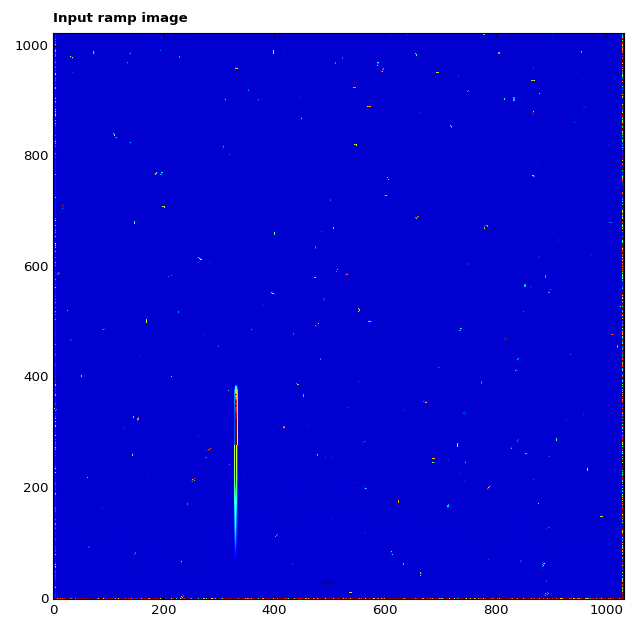

In [4]:
from jwst import datamodels
from matplotlib.colors import LogNorm

# open the input image as a jwst data model
with datamodels.open(input_file) as in_dm:
        
    # plot--------------------------------------
    # show the input ramp image and the calibrated
    # slope image. Note the user may need to adjust
    # the scale parameters of the plot
    %matplotlib notebook
    fig, axs = plt.subplots(1, 1, figsize=(8, 8))

    # sum the groups in the first integration of the input ramp image and plot
    axs.imshow(in_dm.data[0,-1,:,:], cmap='jet', interpolation='nearest', origin='lower', norm=LogNorm(vmin=9e3,vmax=5e4))
    axs.annotate('Input ramp image', xy=(0.0, 1.02), xycoords='axes fraction', fontsize=12, fontweight='bold', color='k')
    axs.set_axis_bgcolor('black')

    plt.tight_layout()
    plt.show()

### Level 2A pipeline (ramps-to-slopes)

#### import the level 2A pipeline class and print description

In [5]:
from jwst.pipeline import SloperPipeline
print SloperPipeline.__doc__

The following task in the fitsblender package can be run with TEAL:
                                  blendheaders                                  


    SloperPipeline: Apply all calibration steps to raw JWST
    ramps to produce a 2-D slope product. Included steps are:
    dq_init, saturation, ipc, superbias, refpix, rscd, lastframe,
    linearity, dark_current, persistence, jump detection, and ramp_fit.

    


For MIRI, the steps in order are: dq_init, saturation, ipc, linearity, RSCD, lastframe, dark_current, refpix, persistence (no-op), jump, ramp_fitting

#### run pipeline

In [6]:
SloperPipeline.call(input_file, output_file='%s_rate.fits' % input_basename)

2017-02-16 11:34:55,764 - stpipe.SloperPipeline - INFO - SloperPipeline instance created.
2017-02-16 11:34:55,766 - stpipe.SloperPipeline.ipc - INFO - IPCStep instance created.
2017-02-16 11:34:55,767 - stpipe.SloperPipeline.saturation - INFO - SaturationStep instance created.
2017-02-16 11:34:55,769 - stpipe.SloperPipeline.rscd - INFO - RSCD_Step instance created.
2017-02-16 11:34:55,771 - stpipe.SloperPipeline.ramp_fit - INFO - RampFitStep instance created.
2017-02-16 11:34:55,772 - stpipe.SloperPipeline.linearity - INFO - LinearityStep instance created.
2017-02-16 11:34:55,774 - stpipe.SloperPipeline.jump - INFO - JumpStep instance created.
2017-02-16 11:34:55,776 - stpipe.SloperPipeline.refpix - INFO - RefPixStep instance created.
2017-02-16 11:34:55,777 - stpipe.SloperPipeline.lastframe - INFO - LastFrameStep instance created.
2017-02-16 11:34:55,779 - stpipe.SloperPipeline.dq_init - INFO - DQInitStep instance created.
2017-02-16 11:34:55,780 - stpipe.SloperPipeline.dark_current -

#### quick check of output

In [7]:
# set the new level 2A filename
level2A_file = input_basename + '_rate.fits'

# open the level 2A file using astropy fits
with fits.open(level2A_file) as hdulist:

    # print extension table info
    hdulist.info()

    # check the status of each 2A calibration step
    print ""
    print 'Status of 2A calibration steps in output header:'
    stepsCheck = ['S_DQINIT', 'S_SATURA', 'S_IPC', 'S_REFPIX', 'S_RSCD', 'S_LASTFR', 'S_LINEAR', 'S_DARK', 'S_PERSIS', 'S_JUMP', 'S_RAMP']
    for key in stepsCheck:
        print key + ': ' + hdulist[0].header[key]


Filename: det_image_1_MIRIMAGE_P750Lexp1_rate.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     173   ()      
  1  SCI         ImageHDU         9   (1032, 1024)   float32   
  2  DQ          ImageHDU        10   (1032, 1024)   int32 (rescales to uint32)   
  3  ERR         ImageHDU         8   (1032, 1024)   float32   
  4  ASDF        ImageHDU         7   (4676,)   uint8   

Status of 2A calibration steps in output header:
S_DQINIT: COMPLETE
S_SATURA: COMPLETE
S_IPC: COMPLETE
S_REFPIX: COMPLETE
S_RSCD: COMPLETE
S_LASTFR: COMPLETE
S_LINEAR: COMPLETE
S_DARK: COMPLETE
S_PERSIS: SKIPPED
S_JUMP: COMPLETE
S_RAMP: COMPLETE


### Level 2B pipeline

#### import the level 2B pipeline class and print description

In [8]:
from jwst.pipeline import Spec2Pipeline
print Spec2Pipeline.__doc__


    Spec2Pipeline: Processes JWST spectroscopic exposures from Level 2a to 2b.
    Accepts a single exposure or an association as input.

    Included steps are:
    assign_wcs, background subtraction, NIRSpec MSA imprint subtraction,
    NIRSpec MSA bad shutter flagging, 2-D subwindow extraction, flat field,
    source type decision, straylight, fringe, pathloss, photom, resample_spec,
    cube_build, and extract_1d.
    


For the LRS fixed slit, the level 2B steps in order are: assign_wcs, bkg_subtract, flat_field, srctype, photom, extract_1d

Note that bkg_subtract requires an association so will not be applied to single files. srctype specifies whether the source is point like or extended. In Build 7, this simply writes the source type keyword without applying an algorithm to make the decision.

#### run pipeline

In [9]:
Spec2Pipeline.call(level2A_file, output_file='%s_cal.fits' % input_basename)

2017-02-16 11:44:36,756 - stpipe.Spec2Pipeline - INFO - Spec2Pipeline instance created.
2017-02-16 11:44:36,757 - stpipe.Spec2Pipeline.pathloss - INFO - PathLossStep instance created.
2017-02-16 11:44:36,759 - stpipe.Spec2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2017-02-16 11:44:36,761 - stpipe.Spec2Pipeline.imprint_subtract - INFO - ImprintStep instance created.
2017-02-16 11:44:36,763 - stpipe.Spec2Pipeline.photom - INFO - PhotomStep instance created.
2017-02-16 11:44:36,765 - stpipe.Spec2Pipeline.resample_spec - INFO - ResampleSpecStep instance created.
2017-02-16 11:44:36,767 - stpipe.Spec2Pipeline.cube_build - INFO - CubeBuildStep instance created.
2017-02-16 11:44:36,769 - stpipe.Spec2Pipeline.straylight - INFO - StraylightStep instance created.
2017-02-16 11:44:36,771 - stpipe.Spec2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2017-02-16 11:44:36,772 - stpipe.Spec2Pipeline.extract_2d - INFO - Extract2dStep instance created.
2017-02-16 11:44:

### check of output

The level 2B pipeline for the LRS produces two files:

_cal.fits - the calibrated level 2B file
_x1d.fits - the 1d spectrum

We can have a look at each of these

In [10]:
# set the output file names
level2B_file = input_basename + '_cal.fits'
spec_file = input_basename + '_x1d.fits'

#### level 2B file

In [11]:
# open the level 2B file using astropy fits
with fits.open(level2B_file) as hdulist:

    # print extension table info
    hdulist.info()

    # check the status of each 2A calibration step
    print ""
    print 'Status of calibration steps in output header:'
    stepsCheck = ['S_WCS', 'S_FLAT', 'S_PHOTOM']
    for key in stepsCheck:
        print key + ': ' + hdulist[0].header[key]


Filename: det_image_1_MIRIMAGE_P750Lexp1_cal.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     266   ()      
  1  SCI         ImageHDU         9   (1032, 1024)   float32   
  2  DQ          ImageHDU        10   (1032, 1024)   int32 (rescales to uint32)   
  3  ERR         ImageHDU         8   (1032, 1024)   float32   
  4  RELSENS     BinTableHDU     13   237R x 2C   [D, D]   
  5  ASDF        ImageHDU         7   (6477201,)   uint8   

Status of calibration steps in output header:
S_WCS: COMPLETE
S_FLAT: COMPLETE
S_PHOTOM: COMPLETE


#### calibrated image

<IPython.core.display.Javascript object>


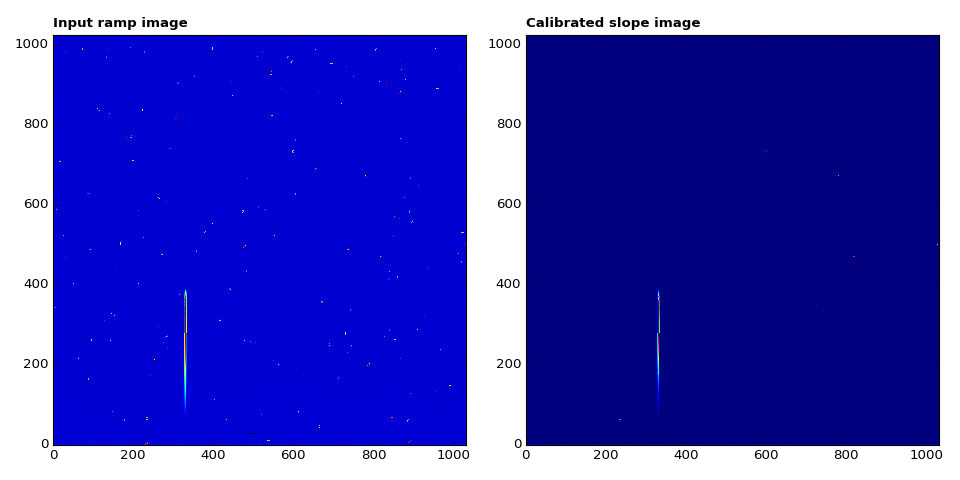

In [12]:
from jwst import datamodels
from matplotlib.colors import LogNorm

# open the input image as a jwst data model
with datamodels.open(input_file) as in_dm:
        
    # open the calibrated image as a jwst data model
    with datamodels.open(level2B_file) as im_dm:

        # plot--------------------------------------
        # show the input ramp image and the calibrated
        # slope image. Note the user may have to adjust
        # the scale parameters
        %matplotlib notebook
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # sum the groups in the first integration of the input ramp image and plot
        axs[0].imshow(in_dm.data[0,-1,:,:], cmap='jet', interpolation='nearest', origin='lower', norm=LogNorm(vmin=9e3,vmax=5e4))
        axs[0].annotate('Input ramp image', xy=(0.0, 1.02), xycoords='axes fraction', fontsize=12, fontweight='bold', color='k')
        axs[0].set_axis_bgcolor('black')
        axs[1].imshow(im_dm.data, cmap='jet', interpolation='nearest', origin='lower', vmin=-1, vmax=1000)
        axs[1].annotate('Calibrated slope image', xy=(0.0, 1.02), xycoords='axes fraction', fontsize=12, fontweight='bold', color='k')
        axs[1].set_axis_bgcolor('black')

        plt.tight_layout()
        plt.show()

#### 1D spectrum

#### Note that the flux units produced by the pipeline step extract_1d are not correct. How flux calibration is applied in the pipeline is still a work in progress (see Pipeline issues page).

<IPython.core.display.Javascript object>


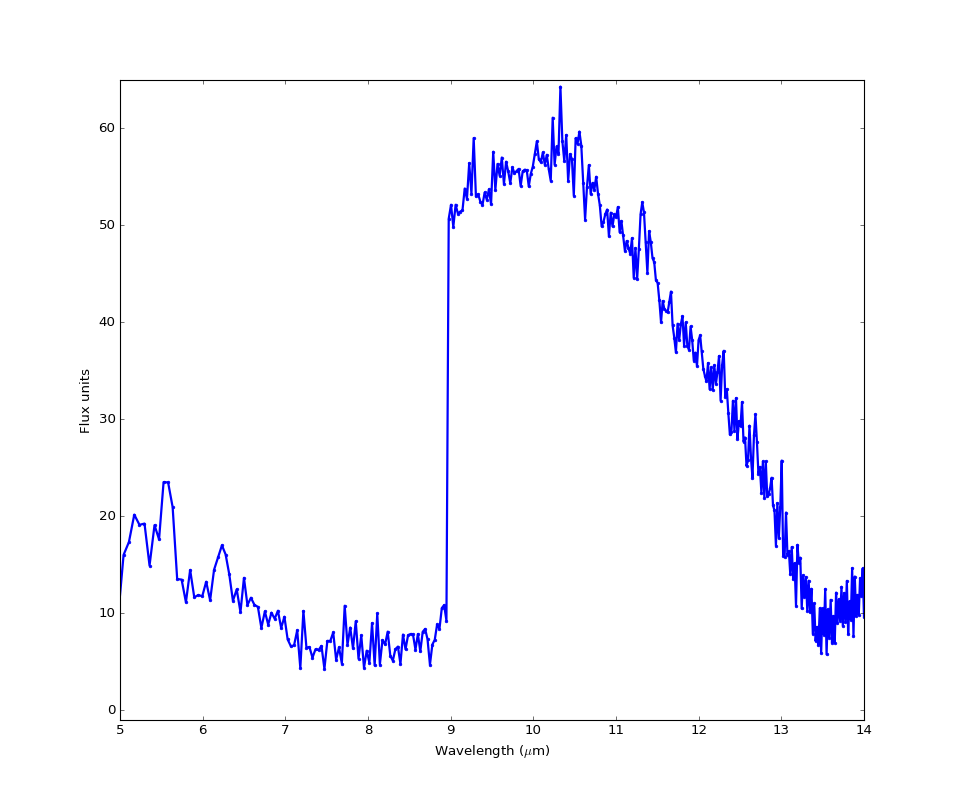

In [17]:
from jwst.datamodels import SpecModel

# open the spectrum as a jwst data model
with SpecModel(spec_file) as spec_dm:

    # plot--------------------------------------
    # simple XY plot of the spectrum
    %matplotlib notebook
    fig, axs = plt.subplots(1, 1, figsize=(12, 10))

    axs.plot(spec_dm.spec_table['WAVELENGTH'][1:-1], spec_dm.spec_table['FLUX'][1:-1], c='b', marker='.', markersize=5, linestyle='-', linewidth=2)
    axs.set_ylabel(r'Flux units')
    axs.set_xlabel(r'Wavelength ($\mu$m)')
    axs.set_ylim(-1,65)
    axs.set_xlim(5,14)

    plt.show()

That's it! You can now run these products through your analysis procedures.